**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Milestone 2






## 1. Introduction

1. Nama    : Imam Ahfas
2. Batch   : FTDS-012
3. Dataset : Walmart |


### Description

### Objective

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:

1. Mampu memahami konsep supervised learning dan unsupervised learning
2. Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
3. Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
4. Mampu melakukan evaluasi model
5. Mampu melakukan model tuning
6. Mampu melakukan model deployment

### Problem Statement

Membuat model Regresi untuk memprediksi penjualan dari Walmart menggunakan dataset yang sudah ada.


## Working Area



## 2. Import Libraries


> Bagian ini berisikan semua library yang digunakan dalam project

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from feature_engine.outliers import Winsorizer

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pickle, os


## 3. Data Loading

> Bagian ini berisikan proses penyiapan data dengan memasukan dataset walmart yang berformat csv

In [2]:
# Memasukan data 
df = pd.read_csv('Walmart.csv')


In [3]:
# Melihat dataset 2 teratas
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [5]:
# Melihat dataset 2 terbawah
df.tail(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
df.columns

In [6]:
# Transform data untuk memudahkan membaca dan menganalisa kolom dari data
df.head(2).T

,0,1
Store,1,1
Date,05-02-2010,12-02-2010
Weekly_Sales,1643690.9,1641957.44
Holiday_Flag,0,1
Temperature,42.31,38.51
Fuel_Price,2.572,2.548
CPI,211.096358,211.24217
Unemployment,8.106,8.106


### Informasi Dataset
|Column Name|Description|
|-|-|
|**Store**|the store number|
|||
|**Date**|the week of sales|
|||
|**Weekly_Sales**|sales for the given store|
|||
|**Holiday_Flag**|whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week|
|||
|**Temperature**|Temperature on the day of sale|
|||
|**Fuel_Price**|Cost of fuel in the region|
|||
|**CPI**|Prevailing consumer price index|
|**Unemployment**|Prevailing unemployment rate|
|**Holiday Events**||
||Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13|
||Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13|
||Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13|
||Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13|
|||

In [7]:
# Melihat unique value dari dataset

for i in df.columns:
    print(i, 'unique: ', df[i].unique(),'\n')

Store unique:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 

Date unique:  ['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011'
 '01-04-2011' '08-04-2011' '15-04-2011'

> Terlihat bahwa nilai pada dataset ini semuanya adalah numerikal, namun kita bisa melihat ada data numerik yang misinya adalah categoric atau memiliki makna, yaitu Holiday Flag yg nilai 1 artinya holiday week dan 0 non holiday week, juga ada keterangan mengenai tanggal tertentu di setiap tahunnya yang memiiki event seperti Super Bowl, Labor Day, Thanksgiving, Christmas, untuk memudahkan analisa akan kita detailkan

In [8]:
# Menambahkan data Super bowl 
df.loc[(df['Date'] == '12-02-2010')|(df['Date'] == '11-02-2011')|(df['Date'] == '10-02-2012')|(df['Date'] == '8-02-2013'),'Super_Bowl'] = 1
df.loc[(df['Date'] != '12-02-2010')&(df['Date'] != '11-02-2011')&(df['Date'] != '10-02-2012')&(df['Date'] != '8-02-2013'),'Super_Bowl'] = 0

In [9]:
# Menambahkan data Labor day
df.loc[(df['Date'] == '10-09-2010')|(df['Date'] == '09-09-2011')|(df['Date'] == '07-09-2012')|(df['Date'] == '06-09-2013'),'Labor_Day'] = 1
df.loc[(df['Date'] != '10-09-2010')&(df['Date'] != '09-09-2011')&(df['Date'] != '07-09-2012')&(df['Date'] != '06-09-2013'),'Labor_Day'] = 0

In [10]:
# Menambahkan data Thanksgiving
df.loc[(df['Date'] == '26-11-2010')|(df['Date'] == '25-11-2011')|(df['Date'] == '23-11-2012')|(df['Date'] == '29-11-2013'),'Thanksgiving'] = 1
df.loc[(df['Date'] != '26-11-2010')&(df['Date'] != '25-11-2011')&(df['Date'] != '23-11-2012')&(df['Date'] != '29-11-2013'),'Thanksgiving'] = 0

In [11]:
# Menambahkan data Christmas
df.loc[(df['Date'] == '31-12-2010')|(df['Date'] == '30-12-2011')|(df['Date'] == '28-12-2012')|(df['Date'] == '27-12-2013'),'Christmas'] = 1
df.loc[(df['Date'] != '31-12-2010')&(df['Date'] != '30-12-2011')&(df['Date'] != '28-12-2012')&(df['Date'] != '27-12-2013'),'Christmas'] = 0

In [12]:
# Melihat ukuran dari dataset
df.shape

(6435, 12)

In [13]:
# Melihat nilai pada Super_Bowl
df['Super_Bowl'].value_counts()

0.0    6300
1.0     135
Name: Super_Bowl, dtype: int64

In [14]:
# Melihat nilai pada Labor_Day
df['Labor_Day'].value_counts()

0.0    6300
1.0     135
Name: Labor_Day, dtype: int64

In [15]:
# Melihat nilai pada Thanksgiving
df['Thanksgiving'].value_counts()

0.0    6345
1.0      90
Name: Thanksgiving, dtype: int64

In [16]:
# Melihat nilai pada Christmas 
df['Christmas'].value_counts()

0.0    6345
1.0      90
Name: Christmas, dtype: int64

In [17]:
# Melihat Holiday Flag dengan nilai 1 yang artinya ada holiday event
df[df['Holiday_Flag']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,0.0,0.0,0.0
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,0.0,1.0,0.0,0.0
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,0.0,0.0,1.0,0.0
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,0.0,0.0,0.0,1.0
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625,0.0,1.0,0.0,0.0
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523,0.0,0.0,1.0,0.0
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523,0.0,0.0,0.0,1.0
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424,1.0,0.0,0.0,0.0


> Terlihat bahwa setiap Holiday Flag dikarenakan ada Superblow atau Labor Day atau Thanksgiving atau Christmas

> Terlihat juga bahwa ada Date yang isinya dalam setiap minggu, akan dirubah formatnya untuk memudahkan dalam analisa

In [18]:
# Merubah format menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])


In [19]:
# Merubah format menjadi day, month, year dan quarter dalam setahun
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df['Quarter'] = df.Month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
df.drop('Date', axis=1, inplace=True)

In [20]:
# Melihat isi dataset teratas
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,6,5,2010,Q2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,0.0,0.0,0.0,3,12,2010,Q4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,4,2,2010,Q1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,4,2,2010,Q1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,0,5,2010,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,0.0,0.0,0.0,0.0,4,9,2012,Q3
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,0.0,0.0,0.0,0.0,3,5,2012,Q2
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0.0,0.0,0.0,0.0,0,12,2012,Q4
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,0.0,0.0,0.0,0.0,4,10,2012,Q4


In [21]:
# Melihat isi dari kolom Day
df['Day'].value_counts()

4    4320
0     495
3     450
6     405
1     405
5     270
2      90
Name: Day, dtype: int64

In [22]:
# Melihat isi dari kolom Month
df['Month'].value_counts()

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: Month, dtype: int64

In [23]:
# Melihat isi dari kolom Year
df['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

- The day of the week dimulai dari 0 = Senin, 6 =  Minggu
- Month dimulai dari 1 = January, 12 = December
- Year terbagi menjadi 3, yaitu 2010, 2011 dan 2012

> Terlihat bahwa Weekly Sales, atau total penjualan setiap minggunya dalam satuan uang posisinya berada di tengah kolom, berdasarkan personal judgement dari dataset ini akan dijadikan target dalam prediksi, lebih mudah dalam analisa apabila fitur/kolom berada dipaling belakang dari dataset

In [24]:
# Memindahkan Weekly_Sales ke kolom terakhir untuk memudahkan analisa
Weekly_Sales = df['Weekly_Sales']
df.drop(labels=['Weekly_Sales'], axis=1, inplace=True)
df.insert(14, 'Weekly_Sales', Weekly_Sales)
df.head(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter,Weekly_Sales
0,1,0,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,6,5,2010,Q2,1643690.90
1,1,1,38.51,2.548,211.242170,8.106,1.0,0.0,0.0,0.0,3,12,2010,Q4,1641957.44


In [25]:
# Merubah format exponent menjadi float
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [26]:
# Melihat isi dari data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.00,23.00,12.99,1.00,12.00,23.00,34.00,45.00
Holiday_Flag,6435.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
Temperature,6435.00,60.66,18.44,-2.06,47.46,62.67,74.94,100.14
Fuel_Price,6435.00,3.36,0.46,2.47,2.93,3.44,3.73,4.47
CPI,6435.00,171.58,39.36,126.06,131.74,182.62,212.74,227.23
Unemployment,6435.00,8.00,1.88,3.88,6.89,7.87,8.62,14.31
Super_Bowl,6435.00,0.02,0.14,0.00,0.00,0.00,0.00,1.00
Labor_Day,6435.00,0.02,0.14,0.00,0.00,0.00,0.00,1.00
Thanksgiving,6435.00,0.01,0.12,0.00,0.00,0.00,0.00,1.00
Christmas,6435.00,0.01,0.12,0.00,0.00,0.00,0.00,1.00


In [27]:
# Duplikasi dataset guna menanggulangi hal-hal yang bisa mencederai data asli/ kesalahan dalam proses analisa
df_copy = df.copy()

In [28]:
# Melihat apakah terdapat nilai sales dibawah samadengan 0
df[df['Weekly_Sales']<=0]

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter,Weekly_Sales


> Tidak ada anomali data dimana sales penjualan kurang dari atau sama dengan 0

> Setelah dilihat Datasetnya yang berisikan Sales Week atau total penjualan mingguan dari Walmart dengan parameter-parameter yang ada dari backgroundnya seperti 
- Store atau nomor identitas dari toko walmart
- Holiday_Flag, artinya terdapat spesial holiday dengan 1 = iya ada holiday, dan 0 = tidak ada
- Temperature, ukuran suhu saat penjualan terjadi dalam Fahrenheit#
- Fuel_Price, Harga dari bahan bakar di daerah tsb
- CPI, Comsumer Price Index atau Indeks Harga Konsumen adalah ukuran yang memeriksa rata-rata tertimbang harga sekeranjang barang dan jasa konsumen
- Unemployment, adalah persentase tingkat pengangguran pada saat itu
- Super_Bowl, adalah event dimana terjadi pertandingan final sepak bola amerika 
- Labor_Day, merupakan hari libur di Amerika Serikat yang berawal dari usaha gerakan serikat buruh untuk merayakan keberhasilan ekonomi dan sosial para buruh.
- Thanksgiving, merupakan hari di mana banyak orang menghabiskan waktu bersama keluarga mereka
- Christmas, perayaan Natal
- Day, hari 0 = senin, 6 = minggu
- Month, bulan, 1 - Januari, 12 = Minggu
- Year, tahun, 2010-2012
- Quarter, perempat bulan dalam satu tahun
- Weekly Sales, total atau jumlah penjualan dalam tiap minggu

> Dataset ini akan dianalisa lebih dalam berdasarkan personal judgement Target yang akan digunakan adalah Weekly Sales, dan Fitur yang akan digunakan adalah 'Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas', 'Day', 'Month', 'Year', 'Quarter', selanjutnya akan dianalisa lebih dalam pada EDA dan Feature Selction

## 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisikan eksplorasi data dari dataset dengan menggunakan query, grouping, visualisasi sederhana, untuk mengeksplor data dan mendapat insight agar dapat menjadi referensi analisa di tahap selanjutnya

### EDA 1

> 1. EDA pertama yang menarik dan bisa kita lihat adalah hubungan Holiday Flag dan Weekly Sales

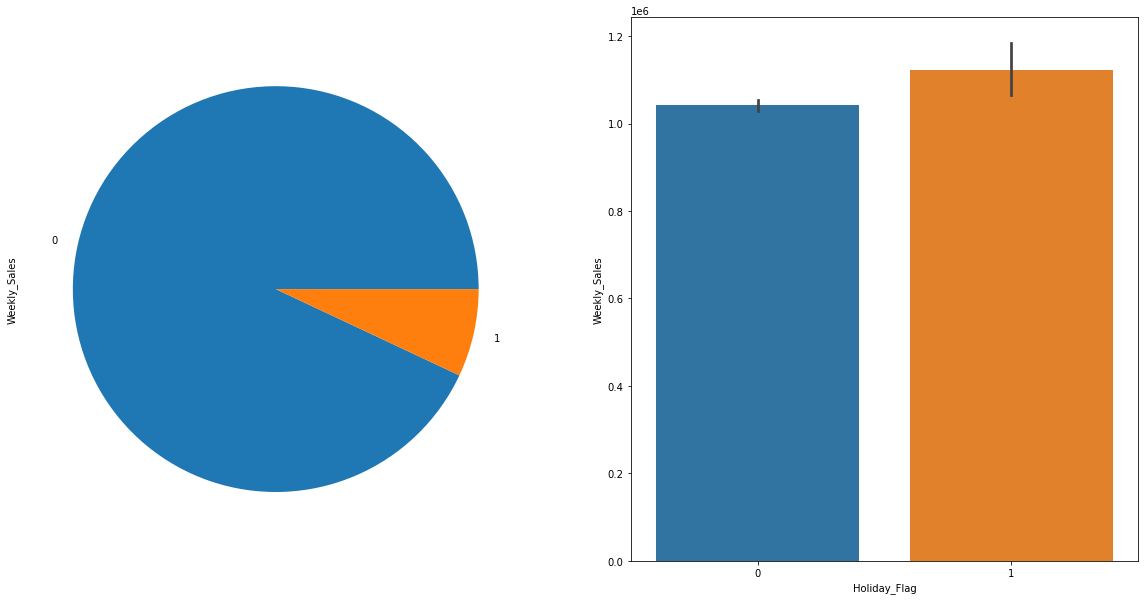

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
df.groupby('Holiday_Flag')['Weekly_Sales'].count().plot(kind="pie")
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.show()

In [30]:
df.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas',
       'Day', 'Month', 'Year', 'Quarter', 'Weekly_Sales'],
      dtype='object')

In [31]:
df[df['Holiday_Flag']==1]['Weekly_Sales'].count()

450

In [32]:
df[df['Holiday_Flag']==0]['Weekly_Sales'].count()

5985

> Pada pie chart terlihat bahwa transaksi lebih banyak dilakukan di luar holiday event, namun jika dilihat dari nilainya lebih besar dilakukan pada saat holiday event yang terlihat pada bar plot di chart kedua

### EDA 2

> 2. DA kedua yang menarik adalah melihat hubungan antara Weekly Sales dengan detail pada saat event holiday itu terjadi yaitu pada saat Superbowl, Labor Day, Thanksgiving dan Christmas

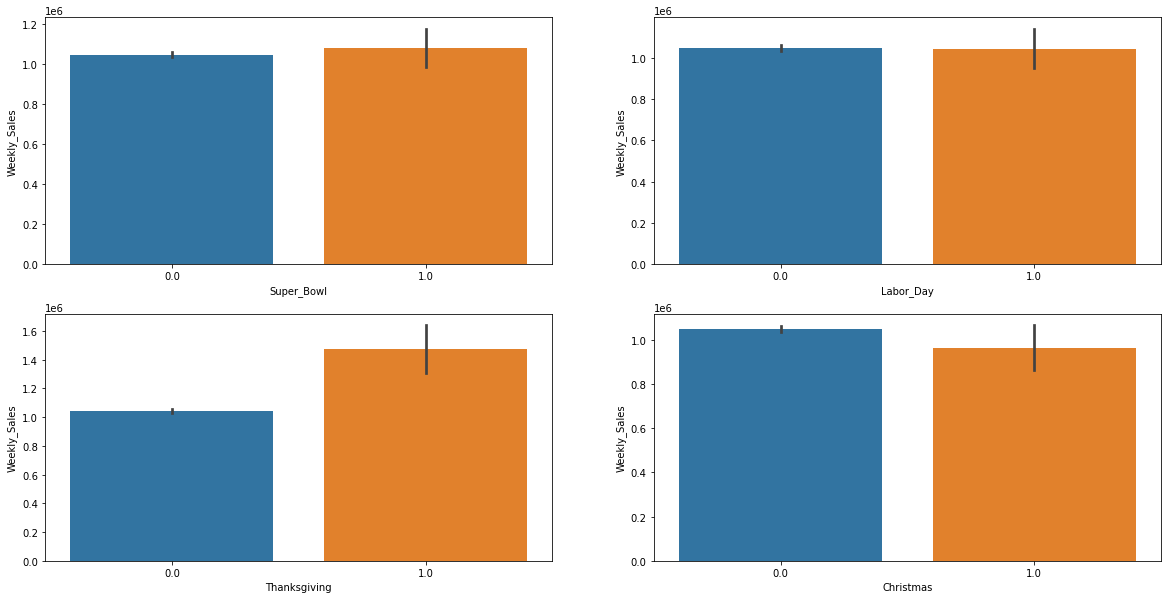

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)
plt.subplot(2, 2, 2)
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)
plt.subplot(2, 2, 3)
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)
plt.subplot(2, 2, 4)
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)
plt.show()

> Pada chart pertama, saat Superbowl pelanggan sedikit lebih banyak yang datang dan membeli dibandingkan dengan diluar holiday event atau Superbowl

> Pada chart kedua, saat Labor Day, tidak begitu terlihat perbedaan akan banyaknya pelanggan yang bertransaksi


> Pada chart ketiga, saat Thanksgiving secara signifikan terlihat lebih banyak pelanggan yang datang dan bertransaksi dibandingkan dengan hari biasanya, dikarenakan saat thanksgiving banyak orang yang berkumpul dengan keluarga untuk merayakannya dan berpesta

> Pada chart keempat, saat Christmas minat pelanggan untuk membeli menurun dibandingkan dibandingkan dengan hari biasanya, mungkin lebih banyak pelanggan yang merayakannya di luar rumah sehingga tidak begitu banyak membutuhkan kebutuhan untuk perayaannya

### EDA 3

> 3. EDA selanjutnya adalah melihat hubungan waktu transaksi dan holiday flag, baik pada hari, bulan tahun dan juga quarter

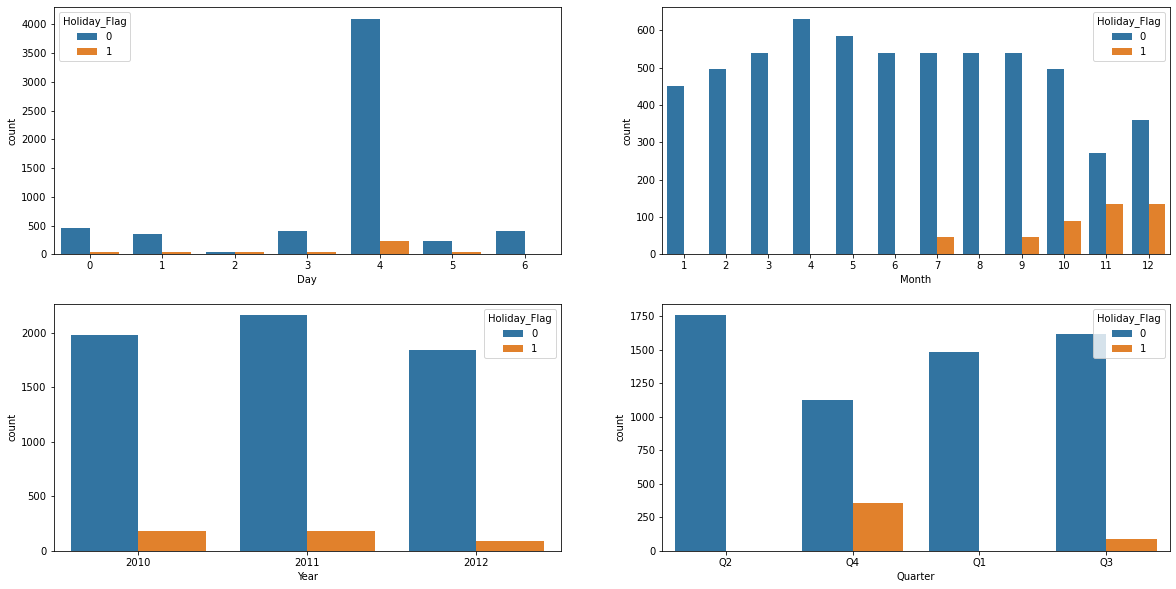

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Day', hue='Holiday_Flag')
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Month', hue='Holiday_Flag')
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Year', hue='Holiday_Flag')
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Quarter', hue='Holiday_Flag')
plt.show()

> Terlihat pada chart pertama yang memperlihatkan Day, bahwa terjadi transaksi yang signifikan besarnya pada hari jumat, mungkin banyak pelanggan yang mempersiapkan bekal untuk weekend atau hari sabtu dan minggu, dan minggu depannya.


> Terlihat pada chart kedua yang memperlihatkan Month, dimana banyaknya transaksi yang terjadi pada bulan ke empat dan lima yaitu bulan april dan mei, sedangkan terjadi penurunan minat belanja pada bulan 11 dan 12

> Terlihat pada chart ketiga yang memperlihatkan Year, dimana banyaknya transaksi paling besar terjadi pada tahun 2011 disusul dengan tahun 2010, dan 2012 menjadi tahun dimana transaksi paling sedikit, nampaknya ini bisa menjadi atensi untuk tim marketing menaikan minat pelanggan untuk berbelanja kembali

> Terlihat pada char keempat yang memperlihatkan Quarter, dimana banyaknya transaksi paling besar terjadi pada Quarter ke 2 kemudian pada quarter ke tiga, dan quarter keempat menjadi yang paling sedikit terjadi transaksi pembelian

### EDA 4

> 4. EDA selanjutnya melihat kondisi Store dari segi transaksinya

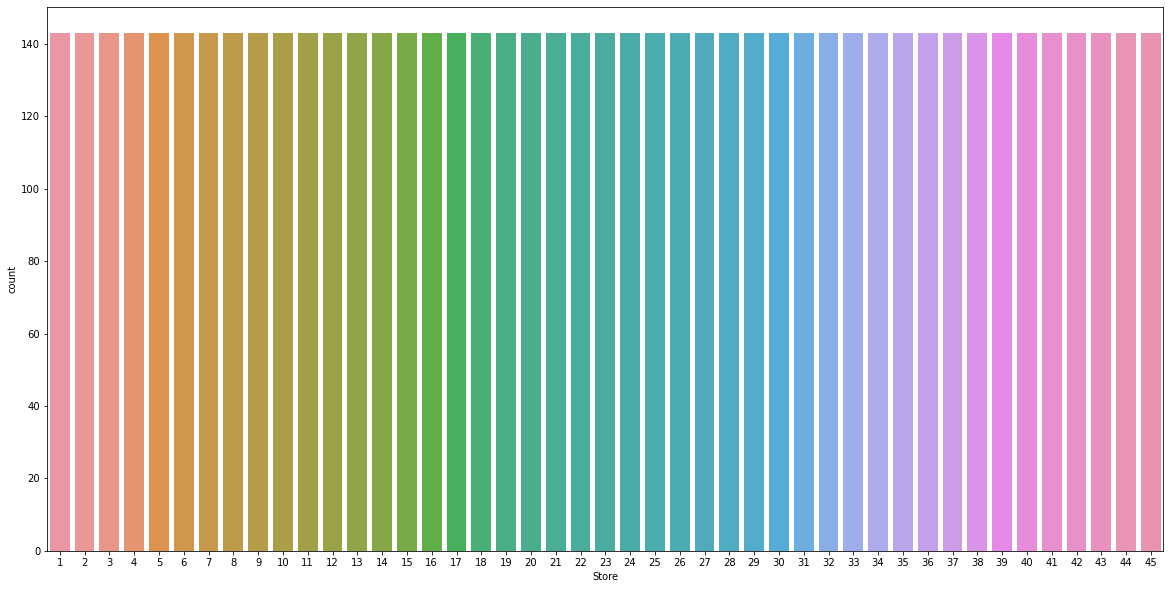

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Store')
plt.show()

> Terlihat bawah setiap store dari nomor 1 hingga 45 memiliki jumlah transaksi yang tidak berbeda jauh, bisa dijadikan pertimbangan untuk menambah lagi cabang dari store

### EDA 5

> 5. EDA selanjutnya adalah melihat hubungan antara Weekly Sales dengan suatu kondisi, dimana suhu tinggi dan rendah, dimana fuel price begitu tinggi, dimana CPI begitu tinggi, dan juga dimana Unemployement rate begitu tinggi

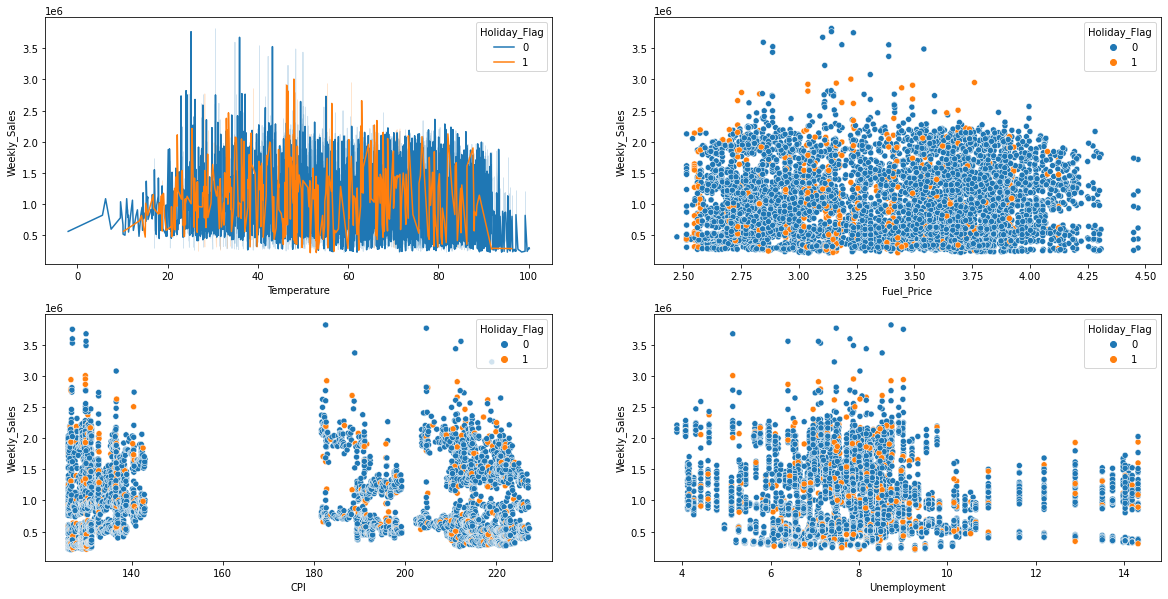

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.lineplot(x='Temperature', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.subplot(2, 2, 2)
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.subplot(2, 2, 3)
sns.scatterplot(x='CPI', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Unemployment', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.show()

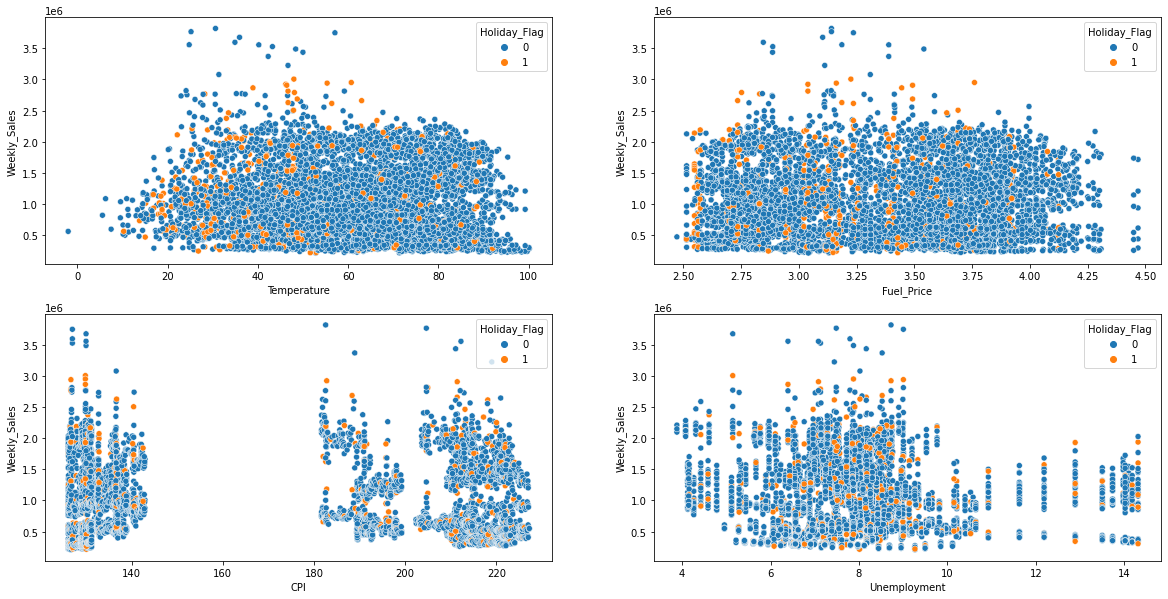

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.subplot(2, 2, 2)
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.subplot(2, 2, 3)
sns.scatterplot(x='CPI', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Unemployment', y='Weekly_Sales', hue = 'Holiday_Flag', data=df)
plt.show()

> Terlihat pada chart pertama dimana Temperature dibawah 20 fahrenheit atau sekitar -6 derajat celcius, minat pelanggan untuk berbelanja menurun, pelanggan lebih banyak datang dan berbelanja pada temperature 40-90 derajat fahrenheit atau sekitar 9-32 derajat celcius.

> Terlihat pada chart kedua dimana Fuel Price di atase 4.00 pelanggan sudah mulai terjadi penurunan minat untuk berbelanja, tentunya ini bisa menjadi evaluasi untuk tim marketing, bagaimana agar Walmart tetap mendapatkan pelanggan sebanyak mungkin meski dengan kondisi seperti ini

> Terlihat pada chart ketiga, dimana CPI atau Consumer Price Index kosong pada nilai CPI 140-180 belum bisa diambil kesimpulan terkait ini, perlu di analisa kembali dengan parameter lainnya agar analisa lebih objective

> Terlihat pada chart keempat, dimana Unemployement rasio di atas 9, dimana tingkat pengangguran cukup tinggi pelanggan lebih sedikit yang berbelanja ke Walmart

### EDA 6

> 6. EDA selanjutnya adalah melihat korelasi antara variabel menggunakan heatmap

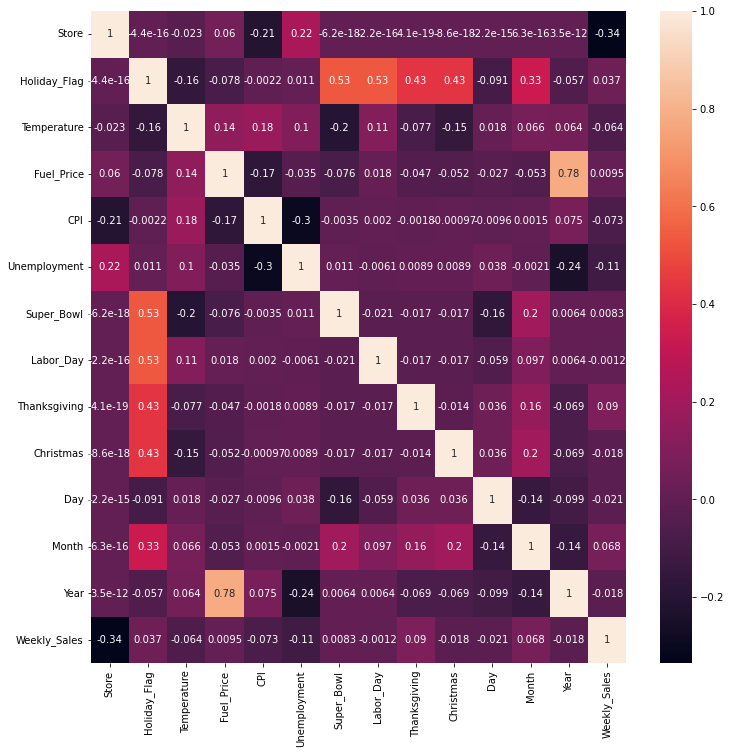

In [39]:
# Melihat hubungan antara tiap fitur menggunakan heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

> Terlihat hubungan antara Weekly Sales dan variabel lain tidak begitu besar, bahkan sangat kecil hubungannya dengan Store karena dapat kita lihat sebelumnya Weekly Sales pada semua store tidak berbeda jauh nilainya, sedangkan yang dapat kita lihat melihat hubungan yang begitu besar adalah Holiday Flag dimana berhubungan cukup besar dengan Holiday Event seperti Superbowl, Labor Day, Christmas, dan Thanksgiving

## 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model



### Get Data for Model Inference

In [ ]:
# Membuat data untuk model inference
df_inf = df.sample(10, random_state=42)
df_inf.head(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter,Weekly_Sales
2436,18,0,42.39,2.81,131.78,9.20,0.00,0.00,0.00,0.00,4,12,2010,Q4,1138800.32
3361,24,0,68.88,3.96,135.27,8.21,0.00,0.00,0.00,0.00,4,6,2011,Q2,1304850.67


In [ ]:
# Remove Inference-Set from Dataset
df_train_test =df.drop(df_inf.index)
df_train_test.head(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter,Weekly_Sales
0,1,0,42.31,2.57,211.10,8.11,0.00,0.00,0.00,0.00,6,5,2010,Q2,1643690.90
1,1,1,38.51,2.55,211.24,8.11,1.00,0.00,0.00,0.00,3,12,2010,Q4,1641957.44


In [ ]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf.head(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter,Weekly_Sales
0,18,0,42.39,2.81,131.78,9.20,0.00,0.00,0.00,0.00,4,12,2010,Q4,1138800.32
1,24,0,68.88,3.96,135.27,8.21,0.00,0.00,0.00,0.00,4,6,2011,Q2,1304850.67


In [ ]:
df.skew()

Store           0.00
Holiday_Flag    3.37
Temperature    -0.34
Fuel_Price     -0.10
CPI             0.06
Unemployment    1.19
Super_Bowl      6.69
Labor_Day       6.69
Thanksgiving    8.28
Christmas       8.28
Day            -1.23
Month           0.02
Year            0.06
Weekly_Sales    0.67
dtype: float64

### Splitting Dataset

> Bagian adalah merupakan pemisahan dataset menjadi dua variabel yaitu variabel X untuk fitur dan y untuk target

In [ ]:
df.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas',
       'Day', 'Month', 'Year', 'Quarter', 'Weekly_Sales'],
      dtype='object')

> Berdasarkan personal judgement untuk menghilangkan waktu pada fitur seperti Day, Month, Year, dan Quarter, karena tidak banyak memiliki hubungan yang besar, dan menjadikan Weekly Sales sebagai Target

In [ ]:
# Split between `X` (Features) and `y` (Target)

X = df_train_test.drop(['Weekly_Sales', 'Day', 'Month', 'Year', 'Quarter'], axis=1)
y = df_train_test['Weekly_Sales']
X.head(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,0,42.31,2.57,211.10,8.11,0.00,0.00,0.00,0.00
1,1,1,38.51,2.55,211.24,8.11,1.00,0.00,0.00,0.00


In [ ]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5140, 10)
Test Size :  (1285, 10)


> Melihat ukuran di tiap variabel, agar kemudian tidak terjadi error karena perbedaan ukuran data

In [ ]:
X_test.shape, y_test.shape

((1285, 10), (1285,))

In [ ]:
X_train.shape, y_train.shape

((5140, 10), (5140,))

### Feature Selection

> Bagian ini adalah bagian dimana menentukan fitur dari dataset yang nantinya akan menjadi data yang akan di training dan di test, Seleksi Fitur dilakukan agar model yang digunakan memiliki kehandalan yang tinggi 

In [ ]:
# Display X_train

X_train.head(2).T

,2080,2031
Store,15.00,15.00
Holiday_Flag,0.00,0.00
Temperature,69.19,57.94
Fuel_Price,3.91,2.85
CPI,136.21,132.77
Unemployment,7.81,8.10
Super_Bowl,0.00,0.00
Labor_Day,0.00,0.00
Thanksgiving,0.00,0.00
Christmas,0.00,0.00


In [ ]:
# Melihat deskripsi dari X_train
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,5140.00,23.13,12.98,1.00,12.00,23.00,34.00,45.00
Holiday_Flag,5140.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
Temperature,5140.00,60.29,18.47,-2.06,47.19,62.11,74.64,100.14
Fuel_Price,5140.00,3.36,0.46,2.47,2.94,3.45,3.74,4.47
CPI,5140.00,171.44,39.29,126.06,131.81,182.61,212.40,227.23
Unemployment,5140.00,8.01,1.88,3.88,6.89,7.91,8.62,14.31
Super_Bowl,5140.00,0.02,0.15,0.00,0.00,0.00,0.00,1.00
Labor_Day,5140.00,0.02,0.15,0.00,0.00,0.00,0.00,1.00
Thanksgiving,5140.00,0.01,0.12,0.00,0.00,0.00,0.00,1.00
Christmas,5140.00,0.01,0.12,0.00,0.00,0.00,0.00,1.00


In [ ]:
# Melihat isi kolom dari X_train
X_train.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

In [ ]:
# Melakukan pemilihan fitur guna melakukan train dan test yang mendapatkan hasil yang handal
X_train = X_train[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']]
X_test = X_test[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']] 

> Berdasarkan personal judgement, yang memiliki kaitan dengan `Weekly_Sales` adalah `Store` dimana adalah nomor identitas dari store Walmart, `Holiday_Flag` berisikan apakah ada holiday event, `Temperature` bagaimana suhu saat itu, `Fuel_Price` berapa harga bahan bakar saat itu, `CPI` bagaimana customer price index saat itu , `Unemployment` berapa rasio pengangguran saat itu, `Super_Bowl` apakah sedang terjadi Superbowl atau tidak, `Labor_Day` apakah sedang terjadi hari buruh atau tidak, `Thanksgiving` apakah sedang terjadi Thanksgiving atau tidak, `Christmas` apakah sedang terjadi perayaan natal atau tidak.

In [ ]:
# Melihat X_train kolom secara keseluruhan
X_train.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

> Memastikan ukuran fitur dan target sama

In [ ]:
X_train.shape, y_train.shape

((5140, 10), (5140,))

In [ ]:
X_test.shape, y_test.shape

((1285, 10), (1285,))

### Handling Missing Values

> Bagian ini adalah bagian dimana melakukan perbaikan data yang hilang atau tidak sesuai. Pada kasus ini kita tidak melakukan trimming/drop kecuali ada anomali data.

In [ ]:
# Check Missing Values on X_train
X_train.isnull().sum()

Store           0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [ ]:
# Check Missing Values on X_test
X_test.isnull().sum()

Store           0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

> Tidak ditemukan missing value di fitur X, sehingga tidak dilakukan handling missing value

In [ ]:
# Check Missing Values on y_train
y_train.isnull().sum()

0

In [ ]:
# Check Missing Values on y_test
y_test.isnull().sum()

0

Tidak ditemukan missing value pada Fitur X dan target y

### Handling Outlier

> Bagian ini merupakan proses pengecekan Outlier pada fitur Training guna membuat data model menjadi lebih handal



In [ ]:
# Melihat data teratas dari X_train
X_train.head(2)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas
2080,15,0,69.19,3.91,136.21,7.81,0.00,0.00,0.00,0.00
2031,15,0,57.94,2.85,132.77,8.10,0.00,0.00,0.00,0.00


In [ ]:
X_train.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

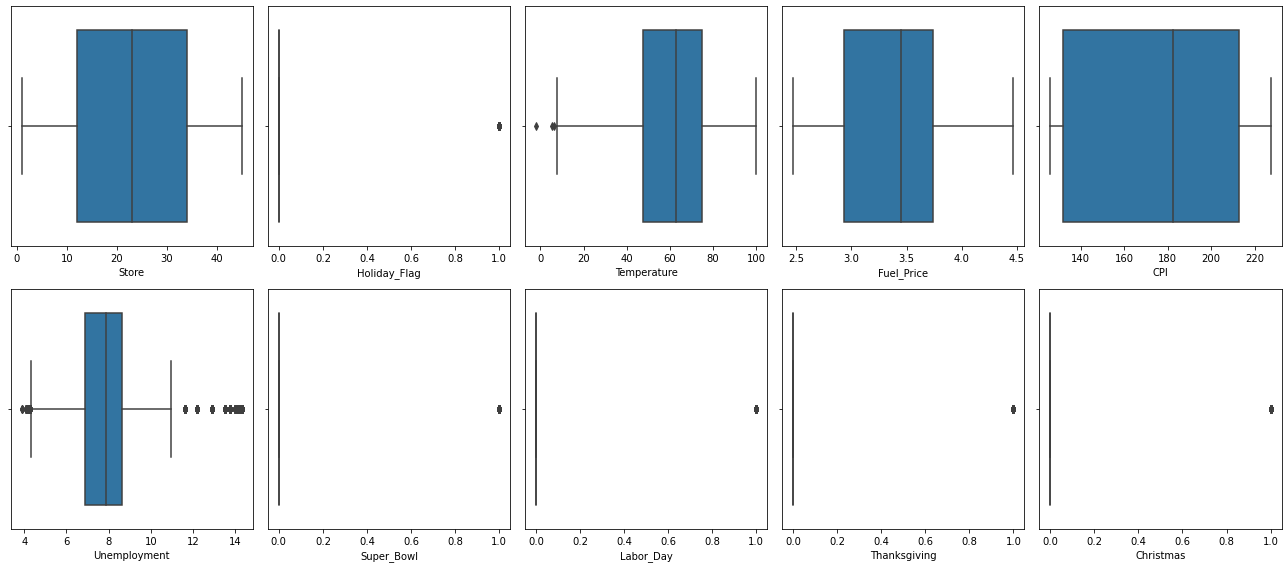

In [ ]:
# Melihat outlier dengan visualisasi Box Plot 

x = plt.figure(figsize=(18, 8))
for i, j in enumerate(X_train):
    x.add_subplot(2, 5, i+1)
    sns.boxplot(df[j])
    x.tight_layout()
plt.tight_layout()

> Terlihat bahwa semua data pada X_train sudah numerik, namun jika kita melilhat lebih detail, terdapat data numerik yang katergorikal, yaitu Holiday Flag, Superbowl, Labor Day, Thanksgiving, dan Christmas, selain data tersebut merupakan numerik yang selanjutnya bisa kita analisa dengan scaling

In [ ]:
# Melihat nilai skewness pada X_train
X_train.skew()

Store          -0.00
Holiday_Flag    3.31
Temperature    -0.33
Fuel_Price     -0.11
CPI             0.07
Unemployment    1.17
Super_Bowl      6.58
Labor_Day       6.46
Thanksgiving    8.40
Christmas       8.10
dtype: float64

> Terlihat terdapat Outlier pada Unemployment dan Temperature

In [ ]:
df.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas',
       'Day', 'Month', 'Year', 'Quarter', 'Weekly_Sales'],
      dtype='object')

> Selanjutnya membuat pipeline yang berisikan handling outlier menggunakan winsorizer iqr untuk yang berdistribusi skew, dan gaussian untuk yang berdistribusi normal, dan juga scaling MinMax Scaler untuk yang berdistribusi skew dan Standarscaler yang berdistribusi normal, dan juga melakukan onhot encoder untuk data holyday karena nilai didalamnya adalah 0 dan 1

In [ ]:
# Preprocessor
numerical_skew_pipeline = Pipeline([
        ("outlier", Winsorizer(capping_method="iqr", tail="both", fold=3)),
        ("MMscaler", MinMaxScaler())
])

numerical_skew_pipeline2 = Pipeline([
        ("MMscaler", MinMaxScaler())
])

numerical_norm_pipeline = Pipeline([
        ("outlier2", Winsorizer(capping_method="gaussian", tail="both", fold=3)),
        ("STDscaler", StandardScaler())
])

numerical_norm_pipeline2 = Pipeline([
        ("STDscaler2", StandardScaler())
])

numerical_holy_pipeline = Pipeline([
        ("OneHot", OneHotEncoder())
])

        
prepocessor = ColumnTransformer([
        ("numeric_skew", numerical_skew_pipeline, ["Unemployment"]),
        ("numeric_skew2", numerical_skew_pipeline2, ["Fuel_Price", "CPI"]),
        ("numeric_norm", numerical_norm_pipeline, ["Temperature"]),
        ("numeric_norm2", numerical_norm_pipeline2, ["Store"]),
        ("numeric_holy", numerical_holy_pipeline, ["Holiday_Flag","Super_Bowl", "Labor_Day", "Thanksgiving", "Christmas"]),
])


## 6 - Model Definition

> Bagian ini merupakan proses pendefinisian model, dan pada dataset ini akan digunakan Linear Regression, SVM, Decision Tree, Random Forest, KNN, Adaboost dan XGBoost karena target pada dataset ini adalah sales penjualan dalam tiap minggunya

In [60]:
# Model definisi untuk Linear Regression
LinReg_df = Pipeline([
    ("prep", prepocessor),
    ("algo_linreg", LinearRegression())
])

In [61]:
# Model definisi untuk Support vector regression
SVM_df = Pipeline([
    ("prep", prepocessor),
    ("algo_svr", SVR())
])

In [62]:
# Model definisi untuk Decision Tree Regression
DT_df = Pipeline([
    ("prep", prepocessor),
    ("algo_DT", DecisionTreeRegressor(random_state=42))
])

In [63]:
# Model definisi untuk Random Forest Regression
RF_df = Pipeline([
    ("prep", prepocessor),
    ("algo_RF", RandomForestRegressor(n_jobs=-1, random_state=42))
])

In [64]:
# Model definisi untuk KNN Regression Model
knn_df = Pipeline([
    ("prep", prepocessor),
    ("algo_knn", KNeighborsRegressor(n_jobs=-1 ))
])

In [65]:
# Model Definisi untuk AdaBoostRegressor
ada_df = Pipeline([
    ("prep", prepocessor),
    ("algo_NB", AdaBoostRegressor(random_state=42))
])

In [66]:
# Model Definisi untuk XGBoostRegression model
XGB_df = Pipeline([
    ("prep", prepocessor),
    ("algo_XGB", XGBRegressor(random_state=42))
])

> Penggunaan n_jobs=-1 dan random_state=42 merupakan parameter yang tidak mempengaruhi pemodelan, hanya saja mempermudah proses analisa dengan menggunakan all processor (n_jobs=-1) dan random_state=42 merupakan parameter yang membuat data model tidak berubah-ubah pada running model selanjutnya

## 7 - Model Training

> Cell pada bagian ini berisi code untuk melatih model dan output yang dihasilkan. 

In [67]:
# Model training untuk Linear Regression
LinReg_df.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric_skew',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Unemployment']),
                                                 ('numeric_skew2',
                                                  Pipeline(steps=[('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI']),
                                                 ('numeric_norm',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(tail='both')),
                                                                  ('STDscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature']),
                                                 ('numeric_norm2',
                                                  Pipeline(steps=[('STDscaler2',
                                                                   StandardScaler())]),
                                                  ['Store']),
                                                 ('numeric_holy',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['Holiday_Flag', 'Super_Bowl',
                                                   'Labor_Day', 'Thanksgiving',
                                                   'Christmas'])])),
                ('algo_linreg', LinearRegression())])

In [68]:
# Model training untuk Support vector machine
SVM_df.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric_skew',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Unemployment']),
                                                 ('numeric_skew2',
                                                  Pipeline(steps=[('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI']),
                                                 ('numeric_norm',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(tail='both')),
                                                                  ('STDscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature']),
                                                 ('numeric_norm2',
                                                  Pipeline(steps=[('STDscaler2',
                                                                   StandardScaler())]),
                                                  ['Store']),
                                                 ('numeric_holy',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['Holiday_Flag', 'Super_Bowl',
                                                   'Labor_Day', 'Thanksgiving',
                                                   'Christmas'])])),
                ('algo_svr', SVR())])

In [69]:
# Model training untuk Decision Tree
DT_df.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric_skew',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Unemployment']),
                                                 ('numeric_skew2',
                                                  Pipeline(steps=[('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI']),
                                                 ('numeric_norm',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(tail='both')),
                                                                  ('STDscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature']),
                                                 ('numeric_norm2',
                                                  Pipeline(steps=[('STDscaler2',
                                                                   StandardScaler())]),
                                                  ['Store']),
                                                 ('numeric_holy',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['Holiday_Flag', 'Super_Bowl',
                                                   'Labor_Day', 'Thanksgiving',
                                                   'Christmas'])])),
                ('algo_DT', DecisionTreeRegressor(random_state=42))])

In [70]:
# Model training untuk Random Forest
RF_df.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric_skew',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Unemployment']),
                                                 ('numeric_skew2',
                                                  Pipeline(steps=[('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI']),
                                                 ('numeric_norm',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(tail='both')),
                                                                  ('STDscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature']),
                                                 ('numeric_norm2',
                                                  Pipeline(steps=[('STDscaler2',
                                                                   StandardScaler())]),
                                                  ['Store']),
                                                 ('numeric_holy',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['Holiday_Flag', 'Super_Bowl',
                                                   'Labor_Day', 'Thanksgiving',
                                                   'Christmas'])])),
                ('algo_RF', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [71]:
# Model training untuk KNN
knn_df.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric_skew',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Unemployment']),
                                                 ('numeric_skew2',
                                                  Pipeline(steps=[('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI']),
                                                 ('numeric_norm',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(tail='both')),
                                                                  ('STDscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature']),
                                                 ('numeric_norm2',
                                                  Pipeline(steps=[('STDscaler2',
                                                                   StandardScaler())]),
                                                  ['Store']),
                                                 ('numeric_holy',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['Holiday_Flag', 'Super_Bowl',
                                                   'Labor_Day', 'Thanksgiving',
                                                   'Christmas'])])),
                ('algo_knn', KNeighborsRegressor(n_jobs=-1))])

In [72]:
# Model training untuk adaboost
ada_df.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric_skew',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Unemployment']),
                                                 ('numeric_skew2',
                                                  Pipeline(steps=[('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI']),
                                                 ('numeric_norm',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(tail='both')),
                                                                  ('STDscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature']),
                                                 ('numeric_norm2',
                                                  Pipeline(steps=[('STDscaler2',
                                                                   StandardScaler())]),
                                                  ['Store']),
                                                 ('numeric_holy',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['Holiday_Flag', 'Super_Bowl',
                                                   'Labor_Day', 'Thanksgiving',
                                                   'Christmas'])])),
                ('algo_NB', AdaBoostRegressor(random_state=42))])

In [73]:
# Model training untuk XGBboost
XGB_df.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric_skew',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Unemployment']),
                                                 ('numeric_skew2',
                                                  Pipeline(steps=[('MMscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI']),
                                                 ('numeric_norm',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(tail='both')),
                                                                  ('S...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1, ...))])

## 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang menunjukkan bagaimana performa model berdasarkan metrics di Linear Regression, SVM, Decision Tree, Random Forest, KNN, Adaboost dan XGBoost

### Prediction Linear Regression

In [74]:
# Predict Train-set dan Test-set
Linreg_y_pred_train= LinReg_df.predict(X_train)
Linreg_y_pred_test= LinReg_df.predict(X_test)

In [75]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, Linreg_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, Linreg_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, Linreg_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, Linreg_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, Linreg_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, Linreg_y_pred_test)))

print('r2score train = ', r2_score(y_train, Linreg_y_pred_train))
print('r2score test = ', r2_score(y_test, Linreg_y_pred_test))

MAE- Error - Train Set :  425900.4301614785
MAE - Error - Test Set  :  441042.0494474708
MSE train =  267417352388.17685
MSE test =  287301479279.5918
RMSE train =  517124.1170049767
RMSE test =  536005.1112439057
r2score train =  0.14596494085700873
r2score test =  0.15602549560290924


> Terlihat model masih belum baik karena nilai MAE Error diatas 400000 dan R2score 14%, kita mencari error sekecilnya dan nilai R2score mendekati 100 % dan good fit

### Prediction SVM

In [76]:
# Predict Train-set dan Test-set
SVM_y_pred_train= SVM_df.predict(X_train)
SVM_y_pred_test= SVM_df.predict(X_test)

In [77]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, SVM_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, SVM_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, SVM_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, SVM_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, SVM_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, SVM_y_pred_test)))

print('r2score train = ', r2_score(y_train, SVM_y_pred_train))
print('r2score test = ', r2_score(y_test, SVM_y_pred_test))

MAE- Error - Train Set :  458876.93376346247
MAE - Error - Test Set  :  483721.9452325945
MSE train =  320321012404.1851
MSE test =  351183231233.1637
RMSE train =  565969.0913859034
RMSE test =  592607.1474705344
r2score train =  -0.022990364425753196
r2score test =  -0.03163302282945146


> Terlihat model masih belum baik karena nilai MAE Error diatas 400000 dan R2score minus, kita mencari error sekecilnya dan nilai R2score mendekati 100 % dan good fit

### Prediction Decision Tree

In [78]:
# Predict Train-set dan Test-set
DT_y_pred_train= DT_df.predict(X_train)
DT_y_pred_test= DT_df.predict(X_test)

In [79]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, DT_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, DT_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, DT_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, DT_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, DT_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, DT_y_pred_test)))

print('r2score train = ', r2_score(y_train, DT_y_pred_train))
print('r2score test = ', r2_score(y_test, DT_y_pred_test))

MAE- Error - Train Set :  0.0
MAE - Error - Test Set  :  95671.15969649806
MSE train =  0.0
MSE test =  34699935464.84047
RMSE train =  0.0
RMSE test =  186279.1868804469
r2score train =  1.0
r2score test =  0.898065749922402


> Terlihat model masih belum baik karena terdapat perbedaan nilai MAE Error yaitu 95671 antara Train dan Test, dan R2score minus terlihat overfitting, kita mencari R2 score yang good fit

### Prediction Random Forest

In [80]:
# Predict Train-set dan Test-set
RF_y_pred_train= RF_df.predict(X_train)
RF_y_pred_test= RF_df.predict(X_test)

In [81]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, RF_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, RF_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, RF_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, RF_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, RF_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, RF_y_pred_test)))

print('r2score train = ', r2_score(y_train, RF_y_pred_train))
print('r2score test = ', r2_score(y_test, RF_y_pred_test))

MAE- Error - Train Set :  26719.229327840436
MAE - Error - Test Set  :  74371.93846365756
MSE train =  2679612355.628222
MSE test =  20439784397.037678
RMSE train =  51764.9722846272
RMSE test =  142967.77398084395
r2score train =  0.9914422797317306
r2score test =  0.9399562544901291


> Terlihat model sudah cukup baik karena MAE Error sudah dibawah 100000 dan perbedaan nilai MAE Error yaitu 47652 antara Train dan Test, dan R2score sudah cukup baik dengan nilai train 99% dan Test 93%

### Prediction KNN

In [82]:
# Predict Train-set dan Test-set
knn_y_pred_train= knn_df.predict(X_train)
knn_y_pred_test= knn_df.predict(X_test)

In [83]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, knn_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, knn_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, knn_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, knn_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, knn_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, knn_y_pred_test)))

print('r2score train = ', r2_score(y_train, knn_y_pred_train))
print('r2score test = ', r2_score(y_test, knn_y_pred_test))

MAE- Error - Train Set :  144825.19504163423
MAE - Error - Test Set  :  199016.48703501947
MSE train =  56813687398.531006
MSE test =  105246941480.0618
RMSE train =  238356.2195507619
RMSE test =  324417.85012551607
r2score train =  0.8185574703951745
r2score test =  0.6908274350077305


> Terlihat model masih belum baik karena terdapat nilai MAE Error diatas 100000 antara Train dan Test, dan R2score minus terlihat overfitting, kita mencari R2 score yang good fit

### Prediction Adaboost

In [84]:
# Predict Train-set dan Test-set
ada_y_pred_train= ada_df.predict(X_train)
ada_y_pred_test= ada_df.predict(X_test)

In [85]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, ada_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, ada_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, ada_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, ada_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ada_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ada_y_pred_test)))

print('r2score train = ', r2_score(y_train, ada_y_pred_train))
print('r2score test = ', r2_score(y_test, ada_y_pred_test))

MAE- Error - Train Set :  400034.1055564073
MAE - Error - Test Set  :  403065.03850657924
MSE train =  214513829672.641
MSE test =  223972538090.03934
RMSE train =  463156.3771261721
RMSE test =  473257.36982115696
r2score train =  0.3149198076513329
r2score test =  0.34206008160109436


> Terlihat model masih belum baik karena terdapat nilai MAE Error di atas 400000 antara Train dan Test, dan R2score terlihat underfitting, kita mencari R2 score yang good fit

### Prediction XGBoost

In [86]:
# Predict Train-set dan Test-set
XGB_y_pred_train= XGB_df.predict(X_train)
XGB_y_pred_test= XGB_df.predict(X_test)

In [87]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, XGB_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, XGB_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, XGB_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, XGB_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, XGB_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, XGB_y_pred_test)))

print('r2score train = ', r2_score(y_train, XGB_y_pred_train))
print('r2score test = ', r2_score(y_test, XGB_y_pred_test))

MAE- Error - Train Set :  31602.842471789885
MAE - Error - Test Set  :  70885.14474027239
MSE train =  2191786515.8488145
MSE test =  18026249425.201195
RMSE train =  46816.51968962253
RMSE test =  134261.86884294884
r2score train =  0.9930002204046408
r2score test =  0.9470462353242286


> Terlihat model sudah cukup baik karena MAE Error sudah dibawah 80000 dan perbedaan nilai MAE Error yaitu 39283 antara Train dan Test, dan R2score sudah cukup baik dengan nilai train 99% dan Test 94.7%

### Cross-validation

In [88]:
# Nilai rata-rata cross validation score pada setiap model
print(cross_val_score(LinReg_df, X_train, y_train).mean())
print(cross_val_score(SVM_df, X_train, y_train).mean())
print(cross_val_score(DT_df, X_train, y_train).mean())
print(cross_val_score(RF_df, X_train, y_train).mean())
print(cross_val_score(knn_df, X_train, y_train).mean())
print(cross_val_score(ada_df, X_train, y_train).mean())
print(cross_val_score(XGB_df, X_train, y_train).mean())

0.14232976499532343
-0.023374357834077618
0.8969031099139209
0.9383702723166609
0.6671914873351351
0.28526408517882684
0.9549530264612536


> Cross validation rata-rata yang paling besar adalah dari XGBoost, kemudian Random Forest dan Decision Tree

In [89]:
# Nilai standard deviasi cross validation score pada setiap model
print(cross_val_score(LinReg_df, X_train, y_train).std())
print(cross_val_score(SVM_df, X_train, y_train).std())
print(cross_val_score(DT_df, X_train, y_train).std())
print(cross_val_score(RF_df, X_train, y_train).std())
print(cross_val_score(knn_df, X_train, y_train).std())
print(cross_val_score(ada_df, X_train, y_train).std())
print(cross_val_score(XGB_df, X_train, y_train).std())

0.00826560853961264
0.006792279691024348
0.013779524585100815
0.00586025133168445
0.017655929288340703
0.046712386064558006
0.0064949531873158845


> Cross validation standard deviasi yang paling kecil adalah dari Random Forest, XGBoost dan SVM

> Oleh karena random forest nilai R2Score sedikit overfit, model yang dipilih untuk dianalisa lebih dalam adalah XGBoost

In [90]:
# Parameter Tuning
parameter = {
    'algo__max_depth': [1,3,6,10,12],
    'algo__learning_rate': [0.01, 0.05, 0.1, 0, 5, 10],
    'algo__n_estimators': [100, 500, 1000],
    'algo__colsample_bytree': [0.3, 0.7, 0.9]}

In [91]:
# Pipeline
pipeline = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBRegressor(random_state=42))
])

In [92]:
model = GridSearchCV(pipeline, parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric_skew',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both')),
                                                                                         ('MMscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Unemployment']),
                                                                        ('numeric_skew2',
                                                                         Pipeline(steps=[('MMscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Fuel_Price',
                                                                          'CPI']),
                                                                        ('numeric_norm',
                                                                         Pipeline(steps=[('outlier2',...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'algo__colsample_bytree': [0.3, 0.7, 0.9],
                         'algo__learning_rate': [0.01, 0.05, 0.1, 0, 5, 10],
                         'algo__max_depth': [1, 3, 6, 10, 12],
                         'algo__n_estimators': [100, 500, 1000]},
             verbose=1)

In [93]:
# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

{'algo__colsample_bytree': 0.9, 'algo__learning_rate': 0.1, 'algo__max_depth': 3, 'algo__n_estimators': 1000}
0.9834061341048731 0.9510699404057162


In [94]:
print(cross_val_score(model.best_estimator_,X_train,y_train).mean())

0.9592410448647468


In [95]:
print(cross_val_score(model.best_estimator_,X_train,y_train).std())

0.002702716815268516


In [96]:
# Predict Train-set dan Test-set
Grid_XG_y_pred_train= model.best_estimator_.predict(X_train)
Grid_XG_y_pred_test= model.best_estimator_.predict(X_test)

In [97]:
print('MAE- Error - Train Set : ', mean_absolute_error(y_train, Grid_XG_y_pred_train))
print('MAE - Error - Test Set  : ', mean_absolute_error(y_test, Grid_XG_y_pred_test))

print('MSE train = ', mean_squared_error(y_train, Grid_XG_y_pred_train))
print('MSE test = ', mean_squared_error(y_test, Grid_XG_y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, Grid_XG_y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, Grid_XG_y_pred_test)))

print('r2score train = ', r2_score(y_train, Grid_XG_y_pred_train))
print('r2score test = ', r2_score(y_test, Grid_XG_y_pred_test))

MAE- Error - Train Set :  47723.47800705253
MAE - Error - Test Set  :  73931.73003696497
MSE train =  5195908102.4287815
MSE test =  16656520344.437033
RMSE train =  72082.64772071557
RMSE test =  129060.14235400886
r2score train =  0.9834061341048731
r2score test =  0.9510699404057162


> Nilai MAE Error terbaik dari model XGBoost dengan best parameternya
{'algo__colsample_bytree': 0.9, 'algo__learning_rate': 0.1, 'algo__max_depth': 3, 'algo__n_estimators': 1000}
mendapatkan MAE Error dibawah 75000 dengan perbedaan Train dan Testnya adalah 26208, dengan R2Score Train 98% dan Test 95% yang mana sudah baik atau good fit, selanjutnya model dapat di uji dengan model inferens

In [107]:
y.mean()

1046699.1674474723

In [108]:
73931.73003696497/y.mean()

0.0706332175817606

In [98]:
model.best_params_

{'algo__colsample_bytree': 0.9,
 'algo__learning_rate': 0.1,
 'algo__max_depth': 3,
 'algo__n_estimators': 1000}

### Model Saving

In [99]:
os.makedirs("deployment", exist_ok=True)

In [100]:
pickle.dump(model.best_estimator_, open("deployment/model.pkl", "wb"))

## 9 - Model Inference

> Bagian ini merupakan pembuatan model inferens atau melihat data baru berdasarkan model linear regresi yang sudah dibuat

In [101]:
df_inf.reset_index(inplace=True)

In [102]:
df_inf.head(2)

,index,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter,Weekly_Sales
0,0,18,0,42.39,2.81,131.78,9.20,0.00,0.00,0.00,0.00,4,12,2010,Q4,1138800.32
1,1,24,0,68.88,3.96,135.27,8.21,0.00,0.00,0.00,0.00,4,6,2011,Q2,1304850.67


In [103]:
# Predict menggunakan XGboost

XG_y_pred_inf = XGB_df.predict(df_inf)
XG_y_pred_inf

array([1140111.5 , 1366326.9 , 1824913.4 , 1030311.44,  453383.06,
        982745.56, 1248671.  , 1012747.4 , 2056605.1 ,  992377.25],
      dtype=float32)

In [104]:
# Membuat dataframe 

XGB_y_pred_inf = pd.DataFrame(XG_y_pred_inf, columns=['Default - XGB Prediction'], )
XGB_y_pred_inf

,Default - XGB Prediction
0,1140111.50
1,1366326.88
2,1824913.38
3,1030311.44
4,453383.06
5,982745.56
6,1248671.00
7,1012747.38
8,2056605.12
9,992377.25


In [105]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
XGB_y_pred_inf

,Default - XGB Prediction
0,1140111.500
1,1366326.875
2,1824913.375
3,1030311.438
4,453383.062
5,982745.562
6,1248671.000
7,1012747.375
8,2056605.125
9,992377.250


In [106]:
# Menggabungkan hasil data inferensial dan dataset

pd.concat([df_inf, XGB_y_pred_inf], axis=1)

,index,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Day,Month,Year,Quarter,Weekly_Sales,Default - XGB Prediction
0,0,18,0,42.390,2.805,131.784,9.202,0.000,0.000,0.000,0.000,4,12,2010,Q4,1138800.320,1140111.500
1,1,24,0,68.880,3.964,135.265,8.212,0.000,0.000,0.000,0.000,4,6,2011,Q2,1304850.670,1366326.875
2,2,2,0,65.870,3.372,217.325,7.441,0.000,0.000,0.000,0.000,4,10,2011,Q4,1769296.250,1824913.375
3,3,26,0,40.080,3.570,136.462,7.598,0.000,0.000,0.000,0.000,4,11,2011,Q4,1077640.130,1030311.438
4,4,36,0,59.560,2.701,209.980,8.554,0.000,0.000,0.000,0.000,4,3,2010,Q1,428851.990,453383.062
5,5,34,0,78.260,3.476,130.756,9.285,0.000,0.000,0.000,0.000,0,10,2012,Q4,1004523.590,982745.562
6,6,28,0,83.120,3.087,126.102,14.180,0.000,0.000,0.000,0.000,1,3,2010,Q1,1523410.710,1248671.000
7,7,12,0,89.130,3.765,130.720,10.926,0.000,0.000,0.000,0.000,3,6,2012,Q2,1014898.780,1012747.375
8,8,20,0,76.030,2.781,204.605,7.527,0.000,0.000,0.000,0.000,4,7,2010,Q3,1955896.590,2056605.125
9,9,12,0,88.160,3.760,130.738,10.926,0.000,0.000,0.000,0.000,3,3,2012,Q1,958667.230,992377.250


Telah dilakukan model inferens dengan menggunakan XGBoost Regressi model , dan didapat weekly sales prediction based on model pada tabel diatas

## 10. Conclusions, Assumptions, Overall Analysis

Telah dilakukan analisa dan pemodelan dengan 7 model yaitu Linear Regression, SVM, Decision Tree, Random Forest, KNN, Adaboost dan XGBoost, dengan menggunakan dataset Walmart dengan detail sebagai berikut:
- Persiapan data yang kemudian digunakan dalam 7 Pemodelan, memasukan data, mencangkup EDA analysis, splitting dataset menjadi train dan test, kemudian melakukan seleksi fitur, handling missing value tidak dilakukan karena tidak terdapat missing value pada dataset, dan outlier dilakukan berdasarkan distribusi data menggunakan winsorizer gaussian yang terdistribusi normal dan iqr untuk yang terdistribusi tidak normal dan dilakukan dengan pipeline, scaling dan encoding sudah dilakukan sesuai dengan distribusi data dan nilai skewnessnya, MinMaxscaler untuk yang terdistribusi tidak normal dan StandardScaler untuk yang terdistribusi normal, dan dilakukan juga OneHotencoding untuk data holiday flag dan event agar model memahami data yang merupakan ada event dan tidak ada event.
- Implementasi 7 model untuk mencari yang terbaik, membuat prediksi, melakukan training pada model, model evaluasi dengan mendapatkan hasil score dan model terbaik adalah XGBoost dengan nilai train: 0.9834061341048731 dan test: 0.9510699404057162, melakukan model inferens dan mendapat data prediksi Weekly Sales dari Walmart


Terimakasih